# I-V-Curve of a PV Cell from a Two-Diode-Model 

This notebook follows the subsection on the two-diode-model for PV cells from V. Quasching's book "Renwable Energy Systems". 
<br>
The model model leads to an implicit equation for I(V): I cannot be moved solely on one side of the equation.
<br>
The equation has to be solved numerically. We use the Newton method from Scipy.
<br>
We have to find a combination (I,V) such that f(I,V) = 0.

In [1]:
import scipy as sc
from scipy.optimize import newton
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# default values: Kyocera LA441J59, from Quaschning, Renewable Energy Systems
def PVmodel02impl(I=0, V=0, E=1000, T=300, c0=3.09e-3, Is1=1.913e-9, Is2=8.25e-6, m1=1, m2=2, Rs=12.94e-3, Rp=94.1):
    from numpy import exp
    from scipy.constants import k,e
    Iph=c0*E
    VT=k*T/e
    VD=V+I*Rs
    res=Iph-Is1*(exp(VD/(m1*VT))-1)-Is2*(exp(VD/(m2*VT))-1)-VD/Rp-I
    return(res)

In [3]:
PVmodel02impl(3.0, 0.4)

0.000278760840741743

In [4]:
z=PVmodel02impl(3.089565, 0.0)
print(f"{z:f}")

0.000001


In [18]:
z=PVmodel02impl(3.08841, 0.1)
print(f"{z:f}")

-0.000013


In [19]:
V = np.linspace(0.0,0.6,1000)

In [20]:
Iguess=U*0+3

In [21]:
E = 1000
I = newton(PVmodel02impl, Iguess, args=(V,E))

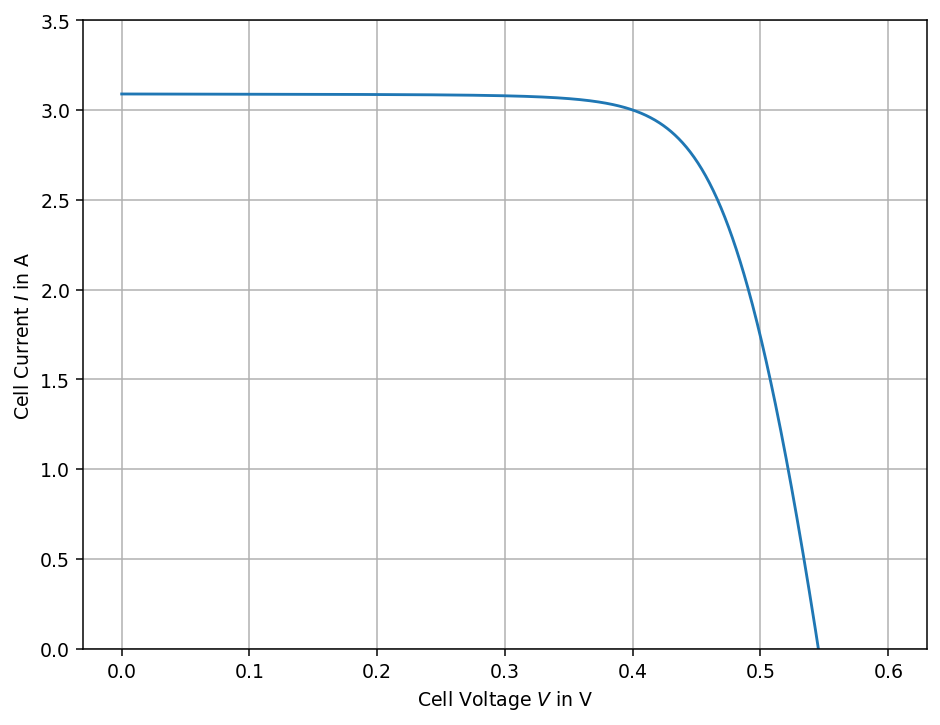

In [23]:
fig1, ax1 = plt.subplots(figsize=(8,6), dpi=136)
ax1.plot(V,I)
ax1.set_ylim(0,3.5)
ax1.set_xlabel(r"Cell Voltage $V$ in V")
ax1.set_ylabel(r"Cell Current $I$ in A")
ax1.grid(True)